# Inflation annual growth rate

In [1]:
# Subscribe to api.insee.fr and get your credentials!
# Save your credentials with init_conn function :
# from pynsee.utils.init_conn import init_conn
# init_conn(insee_key="my_insee_key", insee_secret="my_insee_secret")

# Beware : any change to the keys should be tested after having cleared the cache
# Please do : from pynsee.utils import clear_all_cache; clear_all_cache()"

In [2]:
from pynsee.macrodata import get_series_list, get_series

%matplotlib inline
import matplotlib.pyplot as plt
from textwrap import wrap

df_idbank = get_series_list("IPC-2015")

df_idbank = df_idbank.loc[(df_idbank.FREQ == "M") & # monthly
                          (df_idbank.NATURE == "INDICE") & # index
                          (df_idbank.PRIX_CONSO == "SO") & 
                          (df_idbank.MENAGES_IPC == "ENSEMBLE") & # all kinds of household
                          (df_idbank.REF_AREA == "FE") & # all France including overseas departements
                          (df_idbank.COICOP2016.str.match("^[0-9]{2}$"))] # coicop aggregation level

# get data
data = get_series(df_idbank.IDBANK)

# compute year over year growth rate by IDBANK
data['pct_yoy'] = (data.OBS_VALUE/ data.groupby(['IDBANK']).OBS_VALUE.shift(12) - 1) * 100
data.to_csv('ipc.csv')

Existing environment variables used, instead of locally saved credentials
1/1 - Getting series: 100%|██████████| 13/13 [00:02<00:00,  4.34it/s]


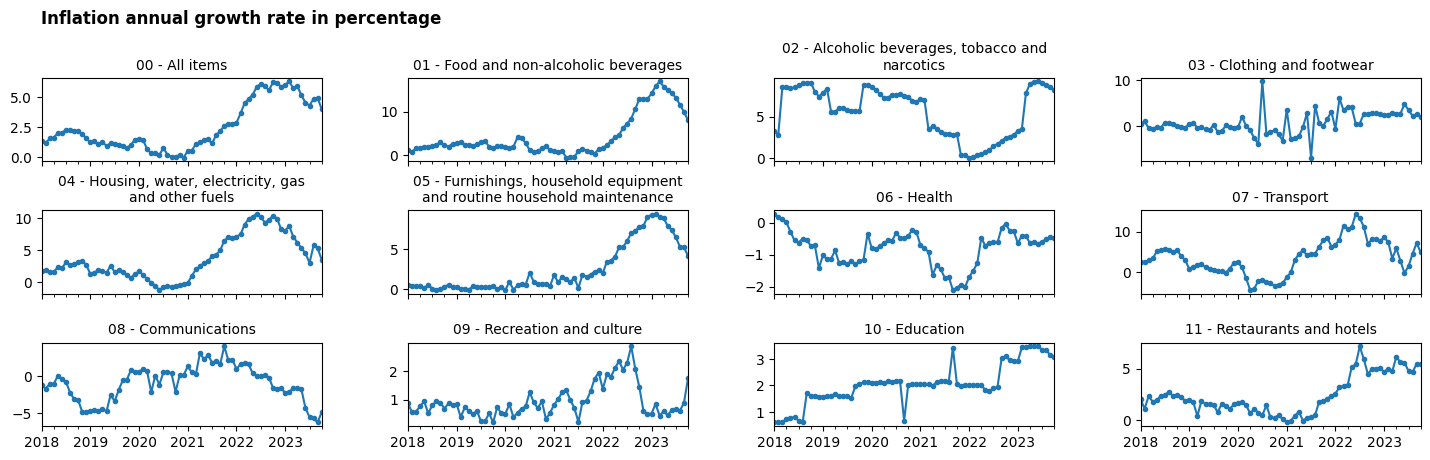

In [3]:
# select dates after 2018-01-01
data = data.loc[data.DATE >= "2018-01-01"]

def make_clean_label(string):
    return("\n".join(wrap(string, 40)))

data['label'] = data['COICOP2016_label_en'].map(make_clean_label)

# plot
fig, axes = plt.subplots(3,4, figsize=(15,5), sharex=True)
plt.suptitle("Inflation annual growth rate in percentage", x = 0.05, y = 0.95,
             horizontalalignment= 'left', 
             fontsize = 12, fontweight='bold')
fig.tight_layout(pad = 2.5)
for (title, group), ax in zip(data.groupby('label'), axes.flatten()):
        group.plot(x='DATE', y='pct_yoy',
                    kind='line', ax=ax,
                    marker='o', markersize=3,
                    legend=False)
        ax.set_title(f'%s' % title,fontsize = 10)
        ax.xaxis.label.set_visible(False)